# PMT calibration

In [1]:
from __future__ import print_function

### Revision

In [2]:
import time
print(time.strftime("%d/%m/%Y"),' ',time.strftime("%H:%M:%S"))

03/11/2016   15:15:48


### Dependencies

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tables
import pandas as pd
import time

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

In [4]:
pp = %env PYTHONPATH
print(pp)
#from Nh5 import *

/Users/hernando/Software/root/lib:/Users/hernando/Software/lib:/Users/hernando/Software/lib:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Core:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Config:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Sierpe:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Calib


### DB  

In [5]:
icdat = '/Users/hernando/Investigacion/NEXT/Data/NEWMCStar/'
ifdat = 'nexus_NEW_NEXT_v0_08_00_Kr_ACTIVE_5bar_1000kev_0.next_10000.root.h5'
h5in =tables.open_file(icdat+ifdat,'a')
# h5in

In [6]:
# DB position of the (ordered) SiPMs 
sipmdb = h5in.root.Sensors.DataSiPM
pmtdb = h5in.root.Sensors.DataPMT

print('DB for a SIPM index {}, {}'.format(0,pmtdb[0]))
positions = map(lambda i: pmtdb[i][2], range(12))
# positions

DB for a SIPM index 0, (0, 1, [-23.9414005279541, 65.77850341796875, -10000.0], 0.001641481856365, -22.916799545288086)


### PMT calibration data

In [26]:
indir='/Users/hernando/Investigacion/NEXT/Data/NEWStar/pmtcalib/161117/'
irun='2845'
infile='pmtCal_r'+irun

In [27]:
# input calibration data: dark current and led
import calib as sc
called = sc.CalData(indir+infile+'_led.txt',nsensors=12)
#caldark = sc.CalData(indir+infile+'_dark.txt')

loaded calibration data from file /Users/hernando/Investigacion/NEXT/Data/NEWStar/pmtcalib/161117/pmtCal_r2845_led.txt
number of sensors with data 12


In [28]:
# create pdf file to put the figures
from matplotlib.backends.backend_pdf import PdfPages
pdf = None

In [29]:
# take the reference values
xbins = called.xbins
indexes = called.indexes

## Calibration

In [30]:
#chi2,pss = sc.cal_fit_ngauss(called,indexes,ngauss=3)
ps0 = np.array([35000., 0., 22., 1., 7., 7.])
bounds = ((0., -10., 10., 0.0, 2., 2.),(200000., 10., 40., 2., 15., 15.))

chi2, pss, cov = sc.cal_fit_poissongauss(called, indexes, ngauss=4, ps0=ps0, bounds=bounds)
zpss = zip(indexes,pss)

fitting data...


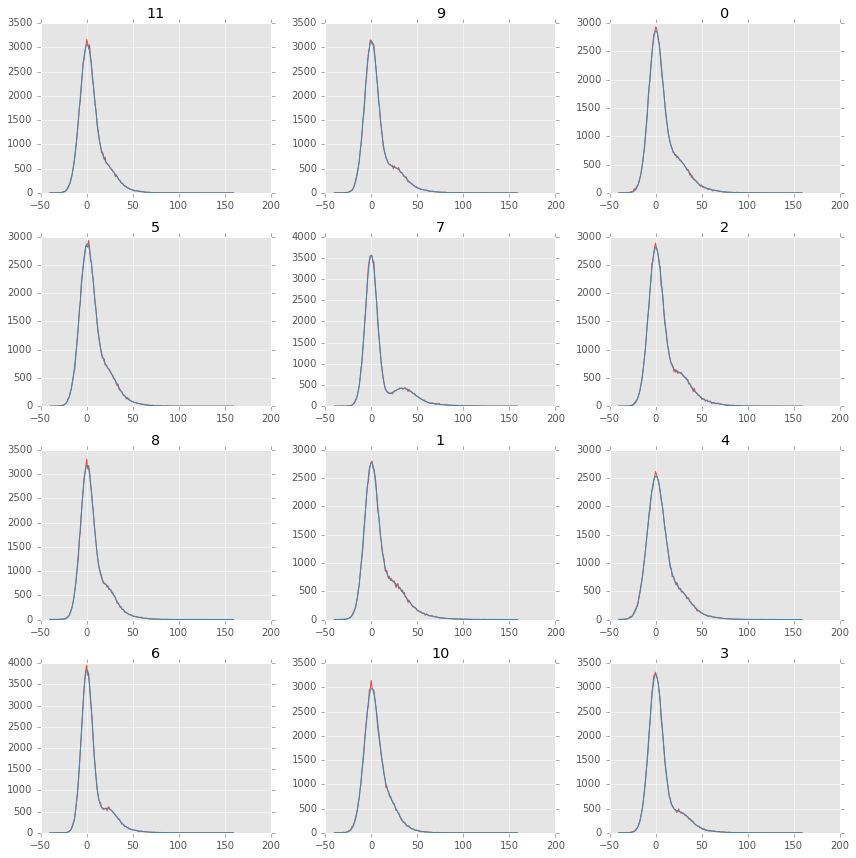

In [31]:
pdf = None
pdf = PdfPages(indir+'calf_R'+irun+'_pg_fits.pdf')
fun = sc.ffun_poissongauss
fig = sc.polo_cal_fit(called, indexes, pss, fun, xrange=(-40.,160.))
if (pdf): pdf.savefig(fig)
pdf.close()

In [32]:
pan = sc.cal_fit_poissongauss_panda(indexes, chi2, pss)

In [33]:
pan

,chi2,gain,indexes,noise,noise-pe,ntot,pedestal,pes
0,0.779827,20.748707,11,7.869581,7.317630,74735.172329,0.103447,0.243236
1,0.760928,23.642494,9,7.451379,9.639637,74757.785652,0.082616,0.272492
2,0.782620,21.239780,0,7.760556,10.082450,74662.318153,0.013744,0.348485
3,0.758644,21.364669,5,8.090104,6.668986,74731.612558,0.241077,0.279771
4,1.066419,33.299607,7,6.584548,12.396136,74705.378244,0.089592,0.248807
5,0.870505,24.365879,2,7.933839,9.706302,74714.815599,0.017234,0.326005
6,0.670332,20.322489,8,7.178406,7.389815,74739.517285,0.124641,0.298544
7,0.929870,21.222503,1,7.566736,11.601208,74726.053796,-0.052219,0.429319
8,0.606614,24.220903,4,9.313656,8.515222,74672.944628,0.011042,0.267645
9,0.878506,22.085247,6,6.143575,8.612919,74706.108057,0.111136,0.251918


In [34]:
pan.to_hdf(indir+'calf_R'+irun+'_pg_panda.h5','df',mode='w',format='table',data_columns=True)
pan.to_csv(indir+'calf_R'+irun+'_pg_panda.csv')

That's all folks!